<H1>ANALISIS DEL COMPORTAMIENTO DE LA DEMANDA DE OCUPACIÓN HOTELERA.<H1/>

Con este analisis se busca mejorar las estrategias para garantizar la ocupación a partir de la toma decisiones acertada en cuanto a 
* Politica de precios 
* Gestión de cancelaciones 
* Anticipación de las reservas

1. Lectura del dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# Cargar CSV
df = pd.read_csv('./data/hotel_bookings_modified.csv')

df.head(10)


C:\Users\jarat\AppData\Local\Temp\ipykernel_30284\1894450639.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/hotel_bookings_modified.csv')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN
5,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN
6,Resort Hotel,0,0,2015.0,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03,NaN
7,Resort Hotel,0,9,2015.0,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03,NaN
8,Resort Hotel,1,85,2015.0,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06,NaN
9,Resort Hotel,1,75,2015.0,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22,NaN


In [4]:
# Inspección básica
df.shape              # Filas y columnas


(58895, 33)

In [5]:
df.info()           # Tipos de datos y nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58895 entries, 0 to 58894
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58895 non-null  object 
 1   is_canceled                     58895 non-null  int64  
 2   lead_time                       58895 non-null  int64  
 3   arrival_date_year               58307 non-null  float64
 4   arrival_date_month              58895 non-null  object 
 5   arrival_date_week_number        58895 non-null  int64  
 6   arrival_date_day_of_month       58895 non-null  int64  
 7   stays_in_weekend_nights         58895 non-null  int64  
 8   stays_in_week_nights            58895 non-null  int64  
 9   adults                          58895 non-null  int64  
 10  children                        58891 non-null  float64
 11  babies                          58895 non-null  int64  
 12  meal                            

In [ ]:
# # Estadísticas básicas (numéricas)
df.select_dtypes(include=float).describe()         


#arreglar chilren porque deberia ser entero
#agent tampoco es float es id



df['required_car_parking_spaces'].unique()

df['days_in_waiting_list'].unique()




array([  0.,  50.,  47.,  65., 122.,  75., 101., 150., 125.,  14.,  60.,
        34., 100.,  22., 121.,  61.,  39.,   5.,   1.,   8., 107.,  43.,
        52.,   2.,  11., 142., 116.,  13.,  44.,  97.,  83.,   4., 113.,
        18.,  20., 185.,  93., 109.,   6.,  37., 105., 154.,  64.,  99.,
        38.,  48.,  33.,  77.,  21.,  80.,  59.,  40.,  58.,  89.,  53.,
        49.,  69.,  87.,  91.,  57., 111.,  79.,  98.,  85.,  63.,  15.,
         3.,  41., 224.,  31.,  56., 187., 176.,  71.,  55.,  96., 236.,
       259., 207., 215., 160., 120.,  30.,  32.,  27.,  62.,  24., 108.,
       147., 379.,  70.,  35., 178., 330., 223., 174., 162., 391.,  68.,
        nan])

In [ ]:




df.describe(include='object')  # Para categóricas


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,reservation_status,reservation_status_date
count,58895,58895,58895,58417,58895,58895,58895,58895,58895,3479.0,58306,58306,58894
unique,2,12,5,141,8,5,10,12,4,277.0,4,3,921
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,223.0,Transient,Check-Out,2015-10-21
freq,40063,7715,45060,27559,25742,46358,39143,31391,52333,784.0,42430,34291,971


In [6]:
df.groupby('is_canceled')['lead_time'].agg(['mean', 'max', 'min', 'std', 'median', 'count'])


,mean,max,min,std,median,count
is_canceled,,,,,,
0,79.356286,737,0,91.395561,42.0,34666
1,129.660035,605,0,106.937363,102.0,24229


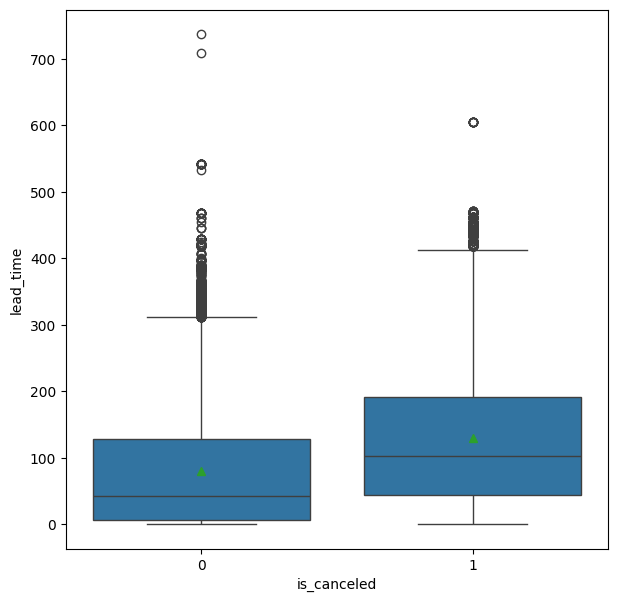

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    x='is_canceled',
    y='lead_time',
    showmeans=True
)
plt.show()


# la t parece que no daria significativa porque se solapan mucho 

<Axes: >

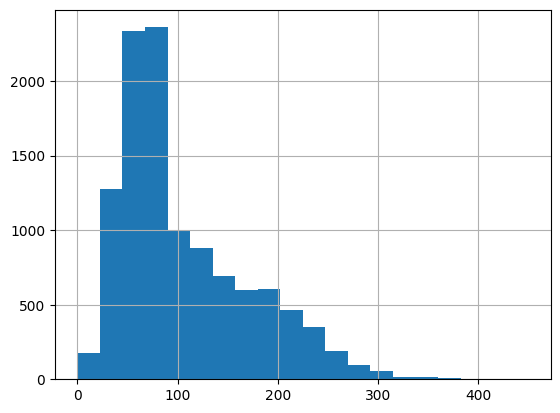

In [5]:
df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)]['adr'].hist(bins=20)


<Axes: >

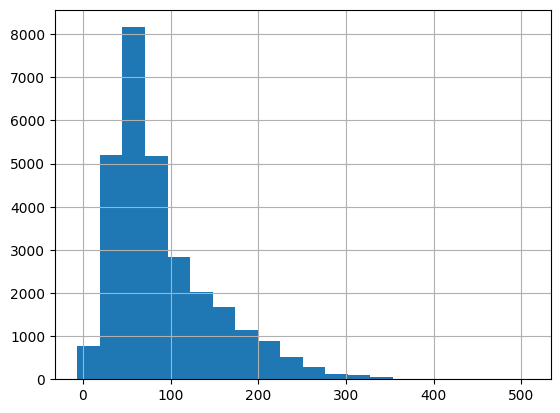

In [36]:
df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]['adr'].hist(bins=20)


<Axes: >

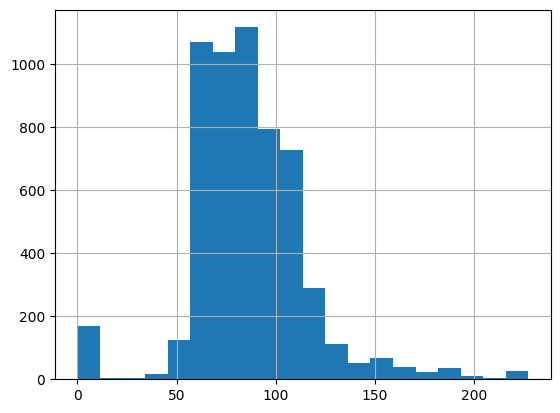

In [35]:
df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]['adr'].hist(bins=20)



In [ ]:
df.loc[df['hotel'].isin(['City Hotel'])]['adr'].sort_values(ascending=False)

df.loc[df['hotel'].isin(['City Hotel'])].sort_values('adr',ascending=False)# volaria ese dato


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
48515,City Hotel,1,35,20016.0,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0.0,Transient,5400.00,0.0,0.0,Canceled,2016-02-19,NaN
57007,City Hotel,1,11,2016.0,September,38,16,1,2,2,2.0,0,HB,FRA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0.0,Transient,306.00,0.0,0.0,Canceled,2016-09-08,NaN
54479,City Hotel,1,21,2016.0,July,30,17,2,1,4,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,NaN,0.0,Transient,299.33,0.0,0.0,Canceled,2016-07-07,NaN
57856,City Hotel,1,26,2016.0,October,40,1,2,2,2,2.0,0,HB,BEL,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0.0,Transient,294.00,0.0,2.0,Canceled,2016-09-16,NaN
55694,City Hotel,1,22,2016.0,August,34,19,0,2,2,2.0,0,HB,ESP,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0.0,Transient,288.00,0.0,2.0,Canceled,2016-08-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42117,City Hotel,0,0,2015.0,August,36,31,1,3,1,0.0,0,BB,RUS,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-09-04,NaN
42140,City Hotel,0,0,2015.0,September,36,1,0,1,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,E,0,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-09-02,NaN
42141,City Hotel,0,1,2015.0,September,36,1,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,F,0,No Deposit,NaN,45.0,0.0,Transient,0.00,0.0,1.0,Check-Out,2015-09-02,NaN
40060,City Hotel,0,6,2015.0,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-03,NaN


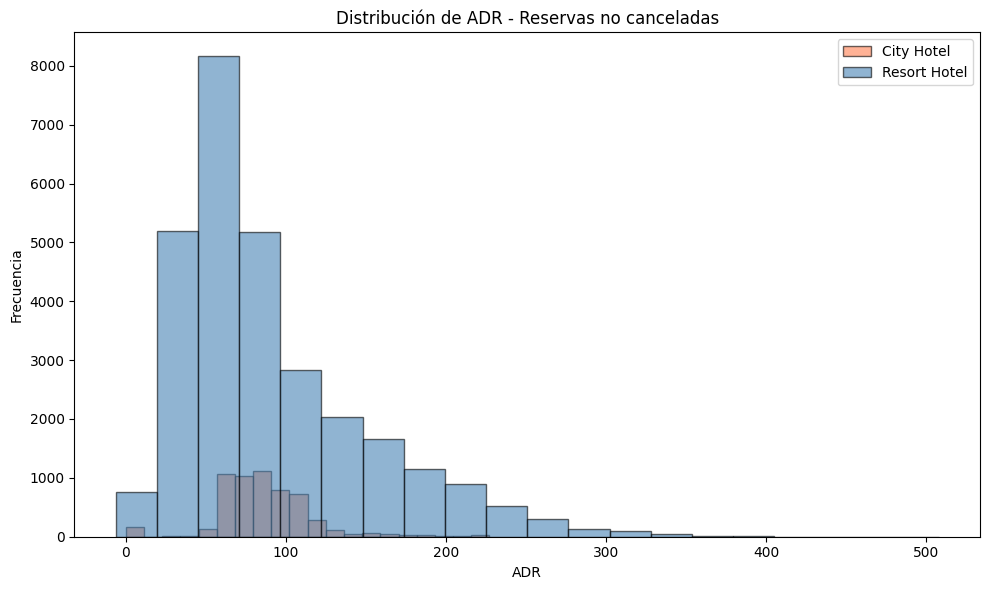

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos
city_adr = df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0), 'adr']
resort_adr = df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0), 'adr']

# Crear el histograma solapado
plt.figure(figsize=(10,6))
plt.hist(city_adr, bins=20, alpha=0.6, label='City Hotel', color='coral', edgecolor='black')
plt.hist(resort_adr, bins=20, alpha=0.6, label='Resort Hotel', color='steelblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de ADR - Reservas no canceladas')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
## hacer esta misma grafica pero con cancelado y no cancelado